In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Dataloader import Dataloader
from RamdomForest import RamdomForest
from score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
parm = {
    'learning_rate' : 0.1,
    'n_estimators' : 100000,
    'max_depth' : [16],
    'num_leaves' : [256],
    'feature_fraction' : [0.9]
}

In [3]:
dataloader = Dataloader()
X_train, X_test, y_train, y_test = dataloader.prepare_train_data(df)

In [4]:
ramdom_forest = RamdomForest()
model = ramdom_forest.train_LGBM(X_train, y_train, X_test, y_test,parm)

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['building_material', 'building_type', 'building_use', 'city', 'parking_price_isna', 'parking_way', 'town', 'txn_floor_isna', 'village']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[10]	training's l1: 341773	valid_1's l1: 353232
[20]	training's l1: 186849	valid_1's l1: 214061
[30]	training's l1: 136160	valid_1's l1: 174622
[40]	training's l1: 114940	valid_1's l1: 161376
[50]	training's l1: 103170	valid_1's l1: 155471
[60]	training's l1: 94751.3	valid_1's l1: 151901
[70]	training's l1: 88661.1	valid_1's l1: 149715
[80]	training's l1: 83220.8	valid_1's l1: 147907
[90]	training's l1: 78747.8	valid_1's l1: 146533
[100]	training's l1: 75229.4	valid_1's l1: 145669
[110]	training's l1: 71750.7	valid_1's l1: 144810
[120]	training's l1: 68657.3	valid_1's l1: 144065
[130]	training's l1: 65822.2	valid_1's l1: 143611
[140]	training's l1: 63119.6	valid_1's l1: 143077
[150]	training's l1: 60746.7	valid_1's l1: 142636
[160]	training's l1: 58573	valid_1's l1: 142235
[170]	training's l1: 56307.2	valid_1's l1: 141745
[180]	training's l1: 54296.1	valid_1's l1: 141387
[190]	training's l1: 52443.2	valid_1's l1: 141022
[200

[1640]	training's l1: 2659.66	valid_1's l1: 136083
[1650]	training's l1: 2623.72	valid_1's l1: 136082
[1660]	training's l1: 2593.14	valid_1's l1: 136083
[1670]	training's l1: 2555.78	valid_1's l1: 136081
[1680]	training's l1: 2518.09	valid_1's l1: 136082
[1690]	training's l1: 2477.43	valid_1's l1: 136085
[1700]	training's l1: 2439.14	valid_1's l1: 136083
[1710]	training's l1: 2406.4	valid_1's l1: 136080
[1720]	training's l1: 2371.73	valid_1's l1: 136082
[1730]	training's l1: 2341.18	valid_1's l1: 136082
[1740]	training's l1: 2313.27	valid_1's l1: 136081
[1750]	training's l1: 2284.4	valid_1's l1: 136081
Early stopping, best iteration is:
[1705]	training's l1: 2423.07	valid_1's l1: 136080
Finished.


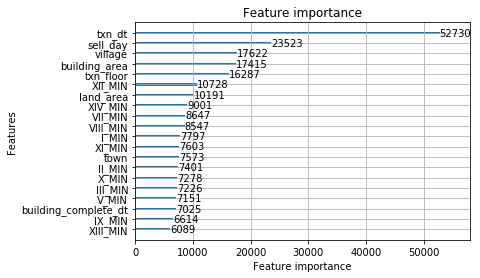

In [5]:
ax = model.plot_feature_important()

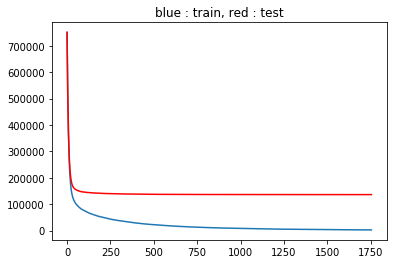

In [6]:
model.plot_loss()

In [7]:
y, y_true= model.predict(X_test,y_test)
hit_rate,point = score(y,y_true)

first part : 5421.3036565977745 last part: 0.8602650508075976
> 20 % : 0.21964689147351685


In [8]:
hit_rate

0.5421303656597775

In [9]:
test_df = pd.read_csv("data/test.csv")
build_id = pd.read_csv("data/submit_test.csv")['building_id']
test_df = dataloader.prepare_test_data(test_df)
test_y, _= model.predict(test_df,y_test)
submit_df = pd.DataFrame(data={
    'building_id' : build_id,
    'total_price' : test_y
})
today = str(date.today())
submit_df.to_csv(f'submits/{today}_lightgbm.csv',index = False)